#  Funciones de distribución de probabilidad

## Distribución uniforme

Genera números aleatorios que son equiprobables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000

# Función para números aleatorios que sigue una distrib. uniforme
data = np.random.uniform(a,b,n)

(array([ 99978., 100209.,  99895., 100279., 100654., 100437.,  99356.,
         99790.,  99629.,  99773.]),
 array([ 1.00014605, 10.90012785, 20.80010965, 30.70009145, 40.60007326,
        50.50005506, 60.40003686, 70.30001866, 80.20000046, 90.09998226,
        99.99996407]),
 <a list of 10 Patch objects>)

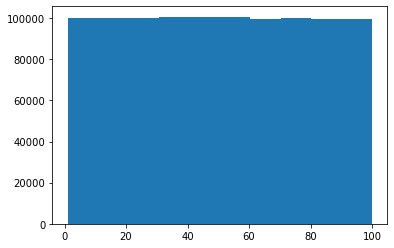

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución normal

In [45]:
x = range(1,100001)
data2 = np.random.randn(100000)

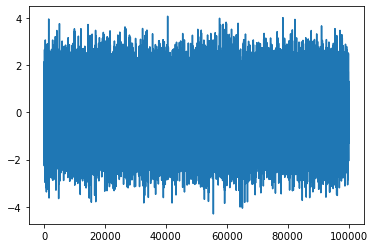

In [46]:
plt.plot(x, data2)

(array([3.0000e+01, 3.6200e+02, 3.1660e+03, 1.3371e+04, 2.8541e+04,
        3.1152e+04, 1.7514e+04, 5.0420e+03, 7.6000e+02, 6.2000e+01]),
 array([-4.30788068, -3.46882692, -2.62977317, -1.79071942, -0.95166566,
        -0.11261191,  0.72644184,  1.5654956 ,  2.40454935,  3.2436031 ,
         4.08265686]),
 <a list of 10 Patch objects>)

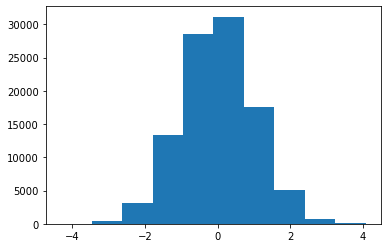

In [47]:
plt.hist(data2)

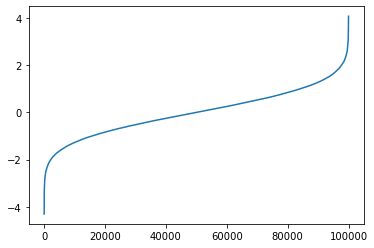

In [48]:
plt.plot(x, sorted(data2))
# El resultado será la función de distribución acumulada

(array([3.000e+00, 2.800e+01, 2.340e+02, 9.560e+02, 2.363e+03, 3.029e+03,
        2.226e+03, 9.410e+02, 1.930e+02, 2.700e+01]),
 array([-5.2807218 , -3.30934435, -1.33796689,  0.63341056,  2.60478802,
         4.57616547,  6.54754293,  8.51892038, 10.49029784, 12.46167529,
        14.43305275]),
 <a list of 10 Patch objects>)

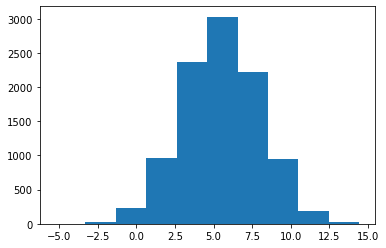

In [54]:
# Si se desea cambiar la desviación estándar y la media
mean = 5.5                  # Ejemplo de calificaciones
sd = 2.5                    # Standard deviation
Z = np.random.randn(10000)  # Distrib. normal

data = mean + sd*Z          # Teorema central del límite: Z = (X - mean)/sd  --> N(0,1) --> X = mean + sd*Z
plt.hist(data)

In [56]:
# También se pueden pedir números random en array
data = np.random.randn(2,4)
data

array([[-1.08341931,  0.23444975, -1.2371211 ,  1.3901555 ],
       [ 0.06891871, -0.673978  ,  1.1581482 ,  1.675685  ]])

## La simulación de Monte Carlo

* Generamos 2 números random uniformes (equiprobables) x e y entre 0 y 1 en total 1000 veces

* Calcular x^2 + y^2 
    * Si el valor es menor a 1 --> estamos dentro del círculo
    * Si el valor es mayor a 1 --> estamos fuera del círculo
* Calmulamos el número total de veces (puntos) que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (100, por ejemplo) para obtener diferentes aproximaciones.
* Calculamos el promedio de las 100 muestras para obtener un alor final.

In [12]:
def pi_montecarlo(n, n_exp):
    
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])     # Como son listas, hay que especificar la posición
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    print(pi)
    fig_pi = plt.plot(pi_value_list)
    
    return pi, fig_pi

3.1416280000000008


(3.1416280000000008, [<matplotlib.lines.Line2D at 0xc802628>])

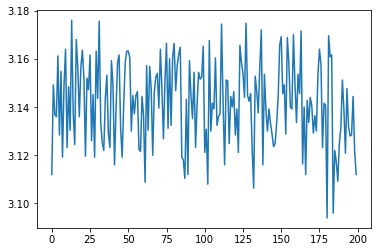

In [13]:
pi_montecarlo(10000,200)

## Dummy datasets

Se trata de una lista o array de números random generados por los métodos ya vistos.

In [19]:
# Transformar diccionario en data frame

n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5*np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [20]:
data.head()

,A,B,C
0,1.246456,3.843151,10.487495
1,0.194192,0.409916,31.162137
2,0.872701,1.339829,13.664071
3,0.445944,1.814042,10.593535
4,-0.195484,3.015248,5.072774


In [21]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000324,1.493890,18.503056
std,0.999838,2.500528,7.786653
min,-5.094774,-9.536897,5.000007
25%,-0.673671,-0.192055,11.775293
50%,-0.000621,1.491260,18.502160
75%,0.673635,3.182852,25.238242
max,5.048383,14.549457,31.999978


(array([2.90000e+01, 1.07600e+03, 1.89630e+04, 1.29659e+05, 3.41356e+05,
        3.48242e+05, 1.38255e+05, 2.11690e+04, 1.22600e+03, 2.50000e+01]),
 array([-5.09477396, -4.08045823, -3.0661425 , -2.05182678, -1.03751105,
        -0.02319532,  0.9911204 ,  2.00543613,  3.01975186,  4.03406758,
         5.04838331]),
 <a list of 10 Patch objects>)

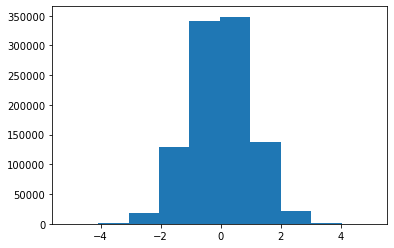

In [22]:
plt.hist(data['A'])

(array([2.76000e+02, 6.11400e+03, 5.77050e+04, 2.23982e+05, 3.69235e+05,
        2.57089e+05, 7.56980e+04, 9.41600e+03, 4.78000e+02, 7.00000e+00]),
 array([-9.53689691, -7.12826156, -4.71962621, -2.31099086,  0.09764449,
         2.50627985,  4.9149152 ,  7.32355055,  9.7321859 , 12.14082126,
        14.54945661]),
 <a list of 10 Patch objects>)

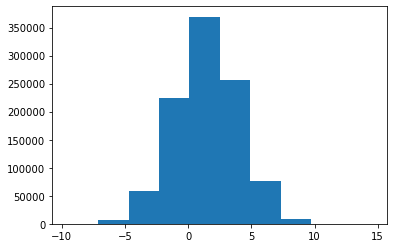

In [23]:
plt.hist(data['B'])

(array([ 99825.,  99489.,  99922., 100364., 100309., 100045., 100232.,
        100234.,  99958.,  99622.]),
 array([ 5.00000729,  7.70000439, 10.40000149, 13.09999859, 15.7999957 ,
        18.4999928 , 21.1999899 , 23.899987  , 26.5999841 , 29.29998121,
        31.99997831]),
 <a list of 10 Patch objects>)

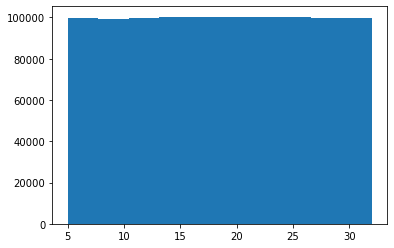

In [24]:
plt.hist(data['C'])

In [26]:
data = pd.read_csv("C:/Users/gerar/OneDrive/Documentos/Curso Machine Learning Data Science/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [27]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [30]:
column_names = data.columns.values.tolist()
a = len(column_names)
a

21

In [35]:
new_data = pd.DataFrame(
    {
        'Column Names': column_names,
        'A': np.random.rand(a),
        'B': np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)      # index para elegi el índice de lo que se está agregando, úti para empalmar/complementar datasets

In [36]:
new_data

,Column Names,A,B
42,State,0.626788,0.966551
43,Account Length,0.724413,0.407301
44,Area Code,0.457364,0.314795
45,Phone,0.388275,0.366375
46,Int'l Plan,0.058840,0.550196
47,VMail Plan,0.793828,0.932957
48,VMail Message,0.423285,0.270926
49,Day Mins,0.932432,0.431336
50,Day Calls,0.560033,0.761762
51,Day Charge,0.390812,0.168659
